<a href="https://colab.research.google.com/github/Wallzers/Stroke_Predictor/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

df = pd.read_csv("/content/drive/MyDrive/stroke.csv")

df.head()


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/stroke.csv")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


True


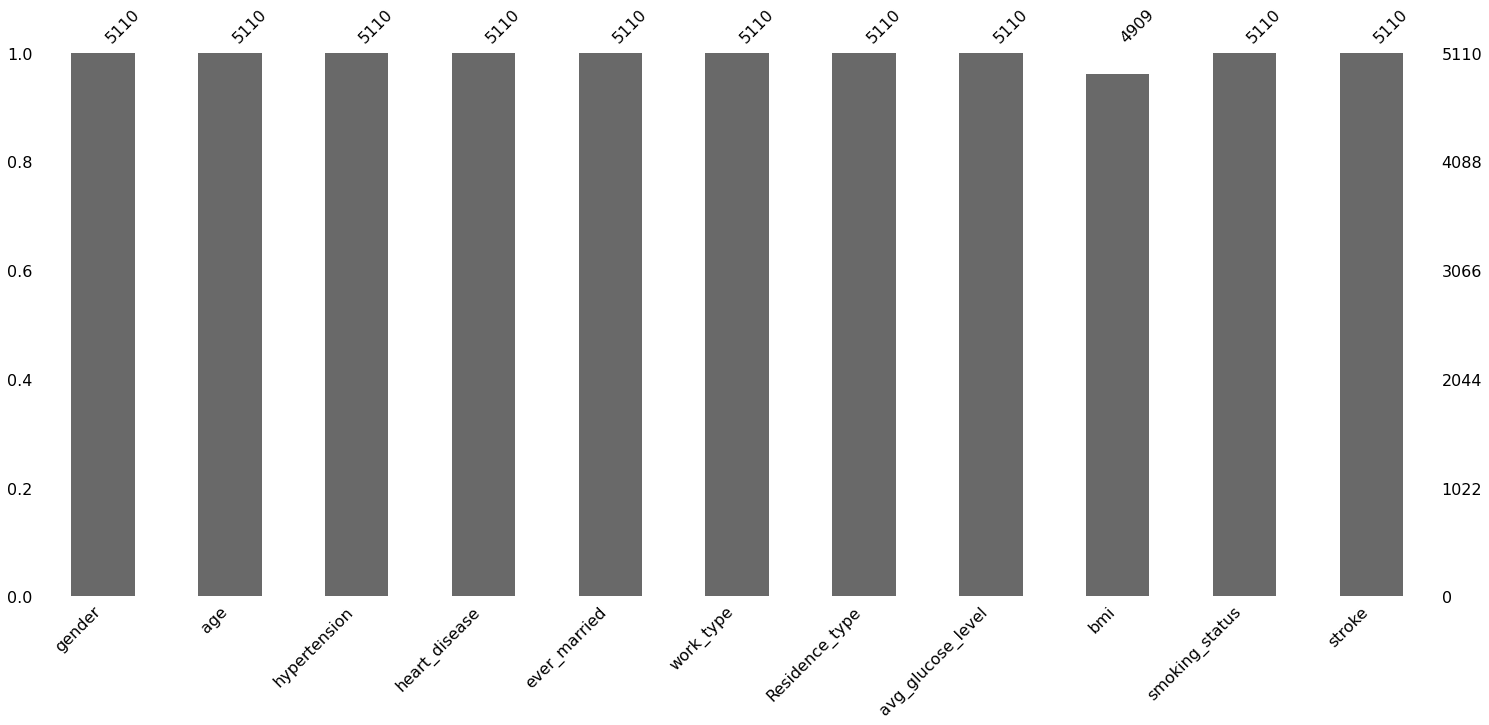

In [ ]:
df.drop(['id'],axis=1,inplace=True)

print(df.isnull().any().any())

import missingno as msno
msno.bar(df)

In [ ]:
df.dropna(inplace=True)

print(df.isnull().any().any())

False


In [ ]:
print(len(df))

4909


In [ ]:
from sklearn.preprocessing import LabelEncoder
df[['gender', 'ever_married','work_type','Residence_type','smoking_status']]=df[['gender', 'ever_married','work_type','Residence_type','smoking_status']].apply(LabelEncoder().fit_transform)

In [ ]:
y=np.array(df.iloc[:,-1])
df.iloc[:,-1].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [ ]:
print(y[500:505])
print(y.shape)

[0 0 0 0 0]
(4909,)


In [ ]:

x=np.array(df.iloc[:,:-1])
df.iloc[:,:-1].value_counts()


gender  age    hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi   smoking_status
0       0.08   0             0              0             4          1               139.67             14.1  0                 1
1       15.00  0             0              0             4          0               62.57              32.3  2                 1
                                                                     1               113.28             23.7  2                 1
                                                                                     95.86              18.1  0                 1
                                                                     0               205.50             24.2  2                 1
                                                                                                                               ..
0       48.00  1             0              1             0          0               221.08    

In [ ]:
print(x[0:5])
print(x.shape)

[[  1.    67.     0.     1.     1.     2.     1.   228.69  36.6    1.  ]
 [  1.    80.     0.     1.     1.     2.     0.   105.92  32.5    2.  ]
 [  0.    49.     0.     0.     1.     2.     1.   171.23  34.4    3.  ]
 [  0.    79.     1.     0.     1.     3.     0.   174.12  24.     2.  ]
 [  1.    81.     0.     0.     1.     2.     1.   186.21  29.     1.  ]]
(4909, 10)


In [ ]:
x

array([[  1.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  1.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   2.  ],
       [  0.  ,  49.  ,   0.  , ..., 171.23,  34.4 ,   3.  ],
       ...,
       [  0.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   2.  ],
       [  1.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   1.  ],
       [  0.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   0.  ]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [ ]:
len(xtest)

982

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(xtrain, ytrain)
accuracy = linear_regression.score(xtest, ytest)
print(accuracy)


0.07180164608589557


In [ ]:
print(xtest,ytest)
print(xtest[1])

[[  0.    25.     0.   ...  65.95  35.     2.  ]
 [  0.    33.     0.   ...  84.48  23.2    1.  ]
 [  1.    80.     1.   ... 240.09  27.     2.  ]
 ...
 [  0.    41.     0.   ...  92.14  29.6    1.  ]
 [  0.     2.     0.   ...  94.92  20.4    0.  ]
 [  1.    53.     0.   ...  95.47  26.     3.  ]] [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [ ]:

predictions = linear_regression.predict(xtest) 
print(predictions)

  


[-8.15513543e-03 -5.73522197e-04  2.08039400e-01  2.84475775e-03
  1.47895360e-02 -3.02381326e-02 -4.40571779e-03 -1.01050218e-02
  6.95873163e-02  1.15908652e-01  8.14661142e-02  2.56012373e-01
 -1.75456462e-02  1.78967212e-02  5.88573505e-02 -4.63194879e-02
  1.59539600e-01  1.25780548e-01  9.81712616e-02 -1.13624509e-02
  1.16193991e-01 -1.35448340e-02  8.37679294e-02  6.34184036e-03
  3.06617991e-02  3.29261474e-02  3.14355870e-02  1.59388907e-02
  1.66975271e-01  4.75818302e-02 -6.10154736e-03 -6.45302016e-03
  5.19726476e-03  4.00464067e-02 -6.93337412e-03  4.49967560e-02
 -2.71607643e-02  2.85412685e-03  2.06425364e-02  4.50665374e-02
  1.44488934e-02 -2.64506446e-02 -2.06230588e-02  3.87404640e-03
  1.46917866e-02  7.89681471e-03  8.84148009e-02  3.72234845e-02
  5.16088996e-02  2.09698549e-02  3.52375312e-03  1.31269328e-01
  1.43001390e-02 -7.25952322e-03  2.09693340e-02  3.32720534e-02
  4.64657186e-02  2.51875082e-02  2.11894031e-02 -9.87972933e-04
  4.36205083e-02  1.63039

In [ ]:
if predictions[22] <=0.1:
  print("NO Stroke")
else :
  print("Stroke")

NO Stroke


In [ ]:
import numpy as np
test_data =[ 0. ,  33 ,  0. ,   0.   , 1.   , 2. ,   1.  , 84.48 ,23.2,   1.  ]
#Convert into numpy array and reshape
test_data = np.array(test_data).astype(np.float)
test_data = test_data.reshape(1,-1)
test_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


array([[ 0.  , 33.  ,  0.  ,  0.  ,  1.  ,  2.  ,  1.  , 84.48, 23.2 ,
         1.  ]])

In [ ]:

predictions = linear_regression.predict(test_data) 
print(predictions)

[-0.00057352]
